In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',header=1)

In [3]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0


In [4]:
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [5]:
df.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

### Checking id uniqueness

In [7]:
df[df.customer_id.duplicated()==True]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


### GENDER

In [8]:
df.gender.unique()

array(['U', 'Male', 'Female', 'M', 'Femal', 'F'], dtype=object)

### past_3_years_bike_related_purchases

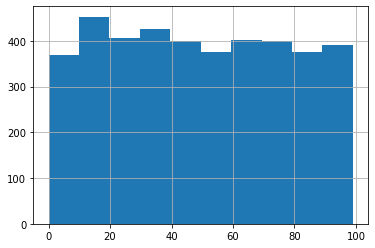

In [9]:
df.past_3_years_bike_related_purchases.hist()

In [10]:
# use nlargest to Get the rows of a DataFrame sorted by the n largest values of columns
df.nlargest(10, columns='past_3_years_bike_related_purchases')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
24,3607,Troy,Blaydes,Male,99,2001-05-22,Clinical Specialist,Health,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,1.0
171,1380,Lavina,Clavey,Female,99,1998-09-30,Financial Analyst,Financial Services,Mass Customer,N,-1,No,3.0
210,3990,Reynard,Hagger,Male,99,1998-03-05,Desktop Support Technician,Health,High Net Worth,N,0,No,1.0
296,173,Ebba,Hanselmann,Female,99,1997-01-02,General Manager,Health,Affluent Customer,N,é¨è½æ ¼,No,1.0
301,381,Leesa,Castleman,Female,99,1996-11-30,Sales Associate,NaN,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,No,1.0
398,2013,Marge,Girault,Female,99,1995-08-10,Registered Nurse,Health,Affluent Customer,N,!@#$%^&*(),Yes,19.0
603,182,Lydon,Dahlman,Male,99,1992-11-20,Sales Associate,Financial Services,Affluent Customer,N,ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...,Yes,7.0
798,286,Kiley,Canaan,Male,99,1989-08-01,Accounting Assistant II,Manufacturing,Affluent Customer,N,"×Ö¼Ö°×¨Öµ××©×Ö´××ª, ×Ö¼Ö¸×¨Ö¸× ×Ö±×Ö¹×Ö´××, ×Ö...",Yes,11.0
817,2472,Mathias,Element,Male,99,1989-06-02,Product Engineer,Health,High Net Worth,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,Yes,16.0
839,1098,Maure,Crow,Female,99,1989-02-01,Administrative Assistant IV,Financial Services,Mass Customer,N,ç°ä¸­ããã«ããã¦ä¸ãã,Yes,12.0


In [11]:
df.nsmallest(100,'past_3_years_bike_related_purchases')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
49,1354,Karee,Hyman,Female,0,2000-10-15,Analyst Programmer,Financial Services,Affluent Customer,N,ï¼ï¼ï¼,No,2.0
284,2777,Dita,Darlison,Female,0,1997-02-26,Safety Technician III,Health,Mass Customer,N,â©testâ©,Yes,1.0
308,475,Vernor,NaN,Male,0,1996-11-14,Nuclear Power Engineer,Manufacturing,Affluent Customer,N,"__ï¾(,_,*)",No,1.0
314,3143,Corabelle,Streatfeild,Female,0,1996-10-24,Chief Design Engineer,Manufacturing,Mass Customer,N,!@#$%^&*(),No,5.0
627,2805,Laverna,Shiril,Female,0,1992-06-27,NaN,Manufacturing,High Net Worth,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,No,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,1928,Sully,Dorling,Male,2,1977-09-24,Chemical Engineer,Manufacturing,High Net Worth,N,â°â´âµâââ,Yes,13.0
1972,1129,Hercule,NaN,Male,2,1977-06-29,VP Marketing,Entertainment,Mass Customer,N,100,Yes,9.0
2020,473,Benji,O'Shirine,Male,2,1977-03-13,Junior Executive,Health,Mass Customer,N,(ï½¡â â âï½¡),Yes,20.0
2077,1787,Tull,Godehard.sf,Male,2,1976-11-21,Executive Secretary,Retail,High Net Worth,N,1,Yes,13.0


In [12]:
df[df.past_3_years_bike_related_purchases <1]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
49,1354,Karee,Hyman,Female,0,2000-10-15,Analyst Programmer,Financial Services,Affluent Customer,N,ï¼ï¼ï¼,No,2.0
284,2777,Dita,Darlison,Female,0,1997-02-26,Safety Technician III,Health,Mass Customer,N,â©testâ©,Yes,1.0
308,475,Vernor,NaN,Male,0,1996-11-14,Nuclear Power Engineer,Manufacturing,Affluent Customer,N,"__ï¾(,_,*)",No,1.0
314,3143,Corabelle,Streatfeild,Female,0,1996-10-24,Chief Design Engineer,Manufacturing,Mass Customer,N,!@#$%^&*(),No,5.0
627,2805,Laverna,Shiril,Female,0,1992-06-27,NaN,Manufacturing,High Net Worth,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,No,4.0
654,602,Lebbie,Bruck,Female,0,1992-03-28,Office Assistant II,NaN,High Net Worth,N,åè£½æ¼¢èª,Yes,9.0
703,1300,Sisely,Strelitzer,Female,0,1991-03-10,Physical Therapy Assistant,Financial Services,Affluent Customer,N,Ã¥ÃâÆÂ©ËâËÂ¬â¦Ã¦,Yes,9.0
815,3843,Mahmoud,Ligerton,Male,0,1989-06-06,Senior Financial Analyst,Financial Services,Mass Customer,N,NaN,Yes,16.0
821,1214,Martino,Shalcros,Male,0,1989-05-01,Internal Auditor,Property,High Net Worth,N,ã,No,15.0
927,2551,Gabrila,Gobbett,Female,0,1987-10-10,VP Quality Control,NaN,Mass Customer,N,âð¿ ðªð¿ ðð¿ ðð¿ ðð¿ ðð¿,No,5.0


### DOB

[Extract time in datetime dtype - Stackoverflow](https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not)
> If you're running a recent-ish version of pandas then you can use the datetime attribute `dt` to access the datetime components

In [13]:
# find those that are 100+
df[df.DOB.dt.year<(2020-100)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0


### job_title

In [14]:
# drop rows with missing job title
df.dropna(subset=['job_title'],axis=0)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3654,Kenyon,Paddefield,U,78,NaT,Electrical Engineer,Manufacturing,Mass Customer,N,NaN,No,NaN
3996,3718,Damiano,NaN,U,22,NaT,Geologist IV,IT,Mass Customer,N,NaN,Yes,NaN
3997,3727,Eba,Youle,U,65,NaT,Assistant Professor,IT,Mass Customer,N,NaN,No,NaN
3998,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN


In [15]:
len(df.job_title.unique())

196

### Industry

In [16]:
df.job_industry_category.unique()

array(['IT', 'Argiculture', 'Health', nan, 'Manufacturing', 'Retail',
       'Telecommunications', 'Financial Services', 'Entertainment',
       'Property'], dtype=object)

### wealth_segment

In [17]:
df.wealth_segment.unique()

array(['Affluent Customer', 'High Net Worth', 'Mass Customer'],
      dtype=object)

### deceased_indicator

In [18]:
df.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

### owns_car

In [19]:
df.owns_car.unique()

array(['No', 'Yes'], dtype=object)

> `decseased_indicator` and `owns_car` should be in boolean

### tenure

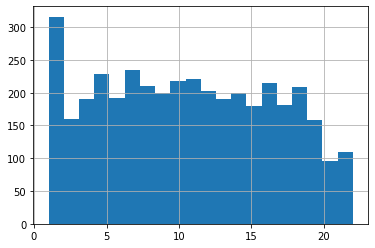

In [20]:
df.tenure.hist(bins=20);

In [21]:
df.tenure.value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

## Customer address table

In [22]:
address = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',header=1)
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [23]:
address.dtypes

customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object

In [24]:
address.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [25]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [26]:
address.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [27]:
for columns in address:
    print (f"checking uniqueness for {columns}:")
    print (address[columns].unique())

checking uniqueness for customer_id:
[   1    2    4 ... 4001 4002 4003]
checking uniqueness for address:
['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']
checking uniqueness for postcode:
[2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263 2154 2119 3016 4113 2032 4352 3020 2116 3057 2099 3749
 2148 3145 2021 2

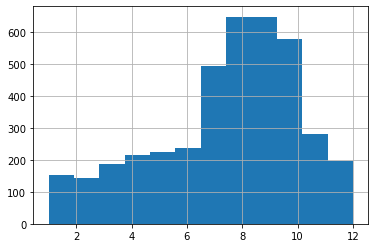

In [28]:
address.property_valuation.hist(bins=12);

## Transaction table

In [29]:
trans = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',header=1)
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [30]:
trans.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [31]:
trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [32]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [33]:
trans.nlargest(1000,"transaction_date")

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
252,253,2,3123,2017-12-30,0.0,Approved,Giant Bicycles,Road,low,small,590.26,525.33,2010-11-05
410,411,62,3355,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,1993-06-23
496,497,62,1854,2017-12-30,1.0,Approved,Solex,Standard,high,medium,1024.66,614.80,1993-10-02
605,606,70,2878,2017-12-30,0.0,Approved,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-26
747,748,80,2865,2017-12-30,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12771,12772,35,368,2017-12-13,1.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2016-11-14
12970,12971,86,1969,2017-12-13,1.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10
13112,13113,10,1008,2017-12-13,0.0,Approved,WeareA2B,Touring,medium,medium,1466.68,363.25,2014-03-03
13239,13240,55,3131,2017-12-13,0.0,Approved,Trek Bicycles,Road,medium,large,1894.19,598.76,2011-08-24


# TASK 2
Analyzing data to build recommendation for client's marketing strategy

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
demo = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',header=1)
address = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',header=1)
transact = pd.read_excel('data/KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',header=1)

## 1. Cleaning-up spreadsheet
### 1.1 address sheet

In [36]:
# standardised State columns
state_dict = {"New South Wales":"NSW", "Victoria":"VIC"}
address.replace(state_dict, inplace = True)

In [37]:
#check if all postcode are 4 digits only
address.postcode.dtype # check if digits only
address.postcode.astype(str).str.len().unique() #check if all postcode are 4 digits only

array([4], dtype=int64)

In [38]:
address[address.customer_id.duplicated()==True] # no duplicate id

,customer_id,address,postcode,state,country,property_valuation


### 1.2 Demographic sheet

In [39]:
demo.head(7)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
1,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,ï½ï½¨(Â´âï½â©,No,1.0
2,1888,Sibyl,Scholtz,Female,67,2002-01-26,Food Chemist,Health,Mass Customer,N,NaN,Yes,1.0
3,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,ÅâÂ´â°ËÃÂ¨ËÃâââ,No,1.0
4,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,testâ testâ«,Yes,1.0
5,422,Vito,Norker,Male,78,2002-01-06,NaN,Manufacturing,Affluent Customer,N,ðµ ð ð ð,No,1.0
6,2296,Nathalia,Sanger,Female,16,2002-01-01,Geologist IV,Retail,Affluent Customer,N,ï½ï½¨(Â´âï½â©,No,1.0


In [40]:
demo.gender.unique()

array(['U', 'Male', 'Female', 'M', 'Femal', 'F'], dtype=object)

In [41]:
# standardise gender
gender_dict={"Male":"M","Female":"F","Femal":"F"}
demo.replace(gender_dict, inplace = True)

In [42]:
# delete default column
demo.drop(labels='default',axis=1,inplace=True)

In [43]:
# Create a temp table with no gender and no birthdays
_ = demo[(demo.gender=="U")|(demo.DOB.isnull()==True)]
_.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0
3913,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN
3914,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,No,NaN
3915,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN
3916,454,Eugenie,Domenc,U,58,NaT,Research Nurse,Health,Affluent Customer,N,Yes,NaN


In [44]:
print(_.gender.unique())
print(_.DOB.unique())

['U']
['1843-12-21T00:00:00.000000000'                           'NaT']


**seems like empty birthdays include the outlier as well**

In [45]:
percent = len(_)/len(demo)*100
print(f"only {percent:.2f}% of demo_sheet is missing")

only 2.20% of demo_sheet is missing


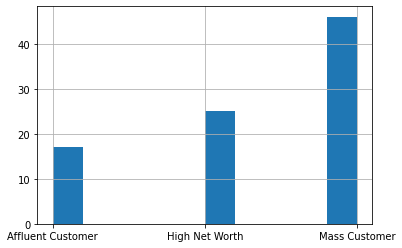

In [46]:
_.wealth_segment.hist();

[How to remove a pandas dataframe from another dataframe](https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe)
> Use `pd.concat` followed by `drop_duplicates(keep=False)`

[How to delete rows from a pandas DataFrame based on a conditional expression](https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving)
> `df = df.drop(df[<some boolean condition>].index)`

In [47]:
new_demo = demo.drop(demo[(demo.gender=="U") | (demo.DOB.isnull()==True)].index)
new_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,66,Anselm,Gawne,M,46,2002-03-11,Account Executive,Argiculture,High Net Worth,N,No,1.0
2,1888,Sibyl,Scholtz,F,67,2002-01-26,Food Chemist,Health,Mass Customer,N,Yes,1.0
3,3435,Stevena,Allcock,F,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,No,1.0
4,2858,Benedicto,Radki,M,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0
5,422,Vito,Norker,M,78,2002-01-06,NaN,Manufacturing,Affluent Customer,N,No,1.0


In [48]:
new_demo.tenure.isna().sum()
    # surprisingly this also solved missing data in tenure column

0

In [49]:
new_demo.isna().sum()
    # columns with missing data are not really important

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

In [50]:
# how much data is missing if job title and job industry is drop
_ = new_demo[(new_demo.job_title.isnull()==True)|(new_demo.job_industry_category.isnull()==True)]

percent = len(_)/len(demo)*100
print(f"{percent:.2f}% of demo_sheet is missing")
    # quite significant >> not dropping

26.20% of demo_sheet is missing


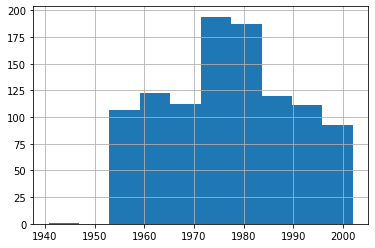

In [51]:
_.DOB.hist();
    # maybe those buyers are childrens who didn't have a job yet

[How To Compare The Date From Two Numpy.datetime64](https://stackoverflow.com/questions/34257880/how-to-compare-the-date-from-two-numpy-datetime64)
> specifying the `datetime64[D]` data type

In [52]:
_[_.DOB > np.datetime64('1990-01-01')]
    # check people born after 1990
    # 200 is not much
    # >>reject the children hypothesis

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
3,3435,Stevena,Allcock,F,80,2002-01-15,Senior Editor,NaN,Affluent Customer,N,No,1.0
4,2858,Benedicto,Radki,M,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,N,Yes,1.0
5,422,Vito,Norker,M,78,2002-01-06,NaN,Manufacturing,Affluent Customer,N,No,1.0
18,442,Linc,Vedyasov,M,2,2001-10-06,NaN,Financial Services,Mass Customer,N,No,1.0
27,874,Howard,Oseland,M,78,2001-05-05,NaN,Health,Mass Customer,N,Yes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
748,2563,Perla,Sabatier,F,49,1990-03-08,Administrative Assistant IV,NaN,Mass Customer,N,Yes,20.0
752,1547,Chiquita,Billyard,F,82,1990-02-26,Account Coordinator,NaN,Mass Customer,N,Yes,12.0
755,700,Josias,Mulliner,M,67,1990-02-20,NaN,Financial Services,Mass Customer,N,No,4.0
760,1105,Sherman,McCusker,M,39,1990-02-10,General Manager,NaN,Mass Customer,N,No,18.0


In [53]:
# converting DOB to integer age
new_demo.DOB.dt.year

1       2002
2       2002
3       2002
4       2002
5       2002
        ... 
3908    1944
3909    1943
3910    1940
3911    1935
3912    1931
Name: DOB, Length: 3912, dtype: int64

In [54]:
new_demo.DOB=2020-new_demo.DOB.dt.year

In [55]:
new_demo.rename(columns={"DOB":"age"},inplace=True)

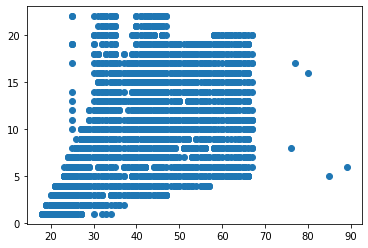

In [56]:
plt.scatter(new_demo.age,
            new_demo.tenure);

In [57]:
# change own car to binary
car_dict = {"Yes":True,"No":False}
new_demo.owns_car.replace(car_dict,inplace=True)
# change deceased_indicator to binary
decesase_dict = {"Y":True,"N":False}
new_demo.deceased_indicator.replace(decesase_dict,inplace=True)

In [58]:
new_demo.dtypes

customer_id                              int64
first_name                              object
last_name                               object
gender                                  object
past_3_years_bike_related_purchases      int64
age                                      int64
job_title                               object
job_industry_category                   object
wealth_segment                          object
deceased_indicator                        bool
owns_car                                  bool
tenure                                 float64
dtype: object

### 1.3 Transaction sheet

In [59]:
transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [60]:
transact.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [61]:
no_online = transact[transact.online_order.isna()]
no_online.isna().sum()
    # status of online order isn't really affected by unbranded products

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                        2
product_line                 2
product_class                2
product_size                 2
list_price                   0
standard_cost                2
product_first_sold_date      2
dtype: int64

In [62]:
no_brand = transact[transact.brand.isna()]
no_brand.isna().sum()
    # All unbranded products also don't have _line, _class, _size , _standard_cost and _first_sold_date
    # check by using `no_brand[no_brand.standard_cost.notna()]`

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 2
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [63]:
no_brand

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [64]:
no_brand.product_id.unique()
    # Unbranded transaction has  product_id of 0

array([0], dtype=int64)

In [65]:
transact[transact.product_id==0]
    # but not all product_id==0 is unbranded

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
34,35,0,2171,2017-08-20,0.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
39,40,0,2448,2017-11-28,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
54,55,0,3140,2017-09-18,0.0,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
60,61,0,1839,2017-02-24,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,1993-10-02
63,64,0,2000,2017-07-08,0.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,2006-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19921,19922,0,1869,2017-01-06,1.0,Approved,Norco Bicycles,Road,medium,medium,543.39,407.54,2003-03-18
19941,19942,0,966,2017-07-30,1.0,Approved,OHM Cycles,Standard,low,medium,71.16,56.93,2005-10-22
19967,19968,0,2751,2017-04-06,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15
19987,19988,0,13,2017-04-05,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2015-04-11


AxesSubplot(0.125,0.125;0.775x0.755)


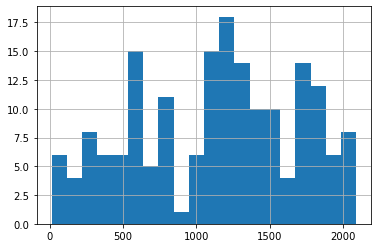

In [66]:
cancelled = transact[(transact.order_status=="Cancelled")]
print(cancelled.list_price.hist(bins=20))
    # unclear trend in list price of cancelled transactions

In [67]:
cancelled

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
42,43,76,488,2017-03-17,0.0,Cancelled,WeareA2B,Standard,low,medium,642.31,513.85,2014-10-10
138,139,32,2073,2017-03-25,0.0,Cancelled,Giant Bicycles,Standard,high,medium,1179.00,707.40,2000-11-03
249,250,48,1454,2017-11-25,0.0,Cancelled,WeareA2B,Standard,medium,medium,1762.96,950.52,1997-02-09
254,255,67,2801,2017-04-01,1.0,Cancelled,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
583,584,43,1019,2017-09-13,1.0,Cancelled,Solex,Standard,medium,medium,1151.96,649.49,1993-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,19406,79,1860,2017-05-29,0.0,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,2015-08-02
19409,19410,79,1771,2017-01-15,0.0,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,2015-08-10
19822,19823,3,2312,2017-12-02,0.0,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,1999-07-20
19957,19958,56,2013,2017-06-04,1.0,Cancelled,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20


In [68]:
percent = len(no_brand)/len(transact)*100
print(f"{percent:.2f}% of demo_sheet is missing")
    # not significant, ommit or include should not influence result as much

0.98% of demo_sheet is missing


In [69]:
unbrand_approved = no_brand[no_brand.order_status=="Approved"]
unbrand_cancelled = no_brand[no_brand.order_status=="Cancelled"]
len(no_brand), len(unbrand_approved), len(unbrand_cancelled), len(cancelled)
    # all unbranded sold effectively >> keep unbrand for customer analysis

(197, 196, 1, 179)

- what is being cancelled?
- So who tends to cancelled?
- should we drop cancelled transactions for our analysis?

In [70]:
cancelled.product_id.value_counts().nlargest(10)
    # product id 0 being cancelled the most, otherwise no significants

0     7
9     5
79    5
86    4
66    4
74    4
40    4
33    4
69    4
67    4
Name: product_id, dtype: int64

In [71]:
cancelled.customer_id.value_counts().nlargest(10)
    # cancell rate is uniformed. no significant here
    # is there a pattern in these customers? do we need to look into it (for the purpose of our analysis)?
        # decided to drop

1726    2
1186    2
2073    2
2852    2
2916    2
511     1
3208    1
2462    1
607     1
3166    1
Name: customer_id, dtype: int64

In [72]:
# Dropping cancelled transactions
new_transact = transact.drop(transact[transact.order_status=="Cancelled"].index)

In [73]:
new_transact

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17


Now that all tables are cleaned and relevant. We can now combine them for analysis model

## 2. Joining and linking tables

In [74]:
new_demo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,66,Anselm,Gawne,M,46,18,Account Executive,Argiculture,High Net Worth,False,False,1.0
2,1888,Sibyl,Scholtz,F,67,18,Food Chemist,Health,Mass Customer,False,True,1.0
3,3435,Stevena,Allcock,F,80,18,Senior Editor,NaN,Affluent Customer,False,False,1.0
4,2858,Benedicto,Radki,M,4,18,Recruiting Manager,NaN,Mass Customer,False,True,1.0
5,422,Vito,Norker,M,78,18,NaN,Manufacturing,Affluent Customer,False,False,1.0


In [75]:
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [76]:
new_transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


### 2.1 linking customer demographic and address

In [77]:
address[address.address.duplicated(False)==True]
    # new problems, duplicated address has different property valuation

,customer_id,address,postcode,state,country,property_valuation
732,737,3 Talisman Place,4811,QLD,Australia,2
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


[Sort DataFrame by value](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
> `DataFrame.sort_values(self, by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False)`

In [78]:
# sort DF by values
address[address.address.duplicated(False)==True].sort_values(by='address')

,customer_id,address,postcode,state,country,property_valuation
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10
732,737,3 Talisman Place,4811,QLD,Australia,2
2470,2475,3 Talisman Place,4017,QLD,Australia,5
2315,2320,64 Macpherson Junction,2208,NSW,Australia,11
3535,3540,64 Macpherson Junction,4061,QLD,Australia,8


Merge DF in Pandas [Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
> It's worth checking documentation, especially when merging with multiple keys, resulting table will have the **Cartesian product** of the associated data

>`result = pd.merge(left, right, on='key')`

In [79]:
customer_combined = pd.merge(new_demo,address,on='customer_id')

In [80]:
customer_combined
    #now we have something similar to NewCustomer worksheet

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,66,Anselm,Gawne,M,46,18,Account Executive,Argiculture,High Net Worth,False,False,1.0,163 Straubel Trail,2217,NSW,Australia,10
1,1888,Sibyl,Scholtz,F,67,18,Food Chemist,Health,Mass Customer,False,True,1.0,9 Emmet Hill,2042,NSW,Australia,10
2,3435,Stevena,Allcock,F,80,18,Senior Editor,NaN,Affluent Customer,False,False,1.0,400 Petterle Crossing,4301,QLD,Australia,3
3,2858,Benedicto,Radki,M,4,18,Recruiting Manager,NaN,Mass Customer,False,True,1.0,0555 Tomscot Plaza,2044,NSW,Australia,10
4,422,Vito,Norker,M,78,18,NaN,Manufacturing,Affluent Customer,False,False,1.0,509 Fisk Hill,2031,NSW,Australia,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903,658,Donn,Bonnell,M,38,76,Tax Accountant,Manufacturing,Affluent Customer,False,True,8.0,355 Thackeray Circle,3025,VIC,Australia,9
3904,2413,Abbey,Murrow,M,27,77,Environmental Specialist,Manufacturing,High Net Worth,False,True,17.0,423 Debra Terrace,3082,VIC,Australia,8
3905,3410,Merrili,Brittin,F,93,80,NaN,Property,Mass Customer,False,False,16.0,1351 Lunder Road,2049,NSW,Australia,10
3906,1092,Katlin,Creddon,F,56,85,VP Quality Control,Retail,Mass Customer,False,False,5.0,5515 Artisan Center,3337,VIC,Australia,3


In [81]:
customer_combined.gender.unique()

array(['M', 'F'], dtype=object)

[Export to Excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html)
> `df1.to_excel("output.xlsx", sheet_name='Sheet_name_1')`

If you wish to write to more than one sheet in the workbook, it is necessary to specify an ExcelWriter object:
```df2 = df1.copy()
with pd.ExcelWriter('output.xlsx') as writer:  
    df1.to_excel(writer, sheet_name='Sheet_name_1')
    df2.to_excel(writer, sheet_name='Sheet_name_2')```


In [82]:
# with pd.ExcelWriter('KPMG.xlsx') as writer:
#     customer_combined.to_excel(writer, sheet_name='Customer_Info')
#     new_transact.to_excel(writer, sheet_name='Transactions')

Write to excel with multiple sheets requires [openpyxl](https://openpyxl.readthedocs.io/en/stable/) module.

[Example: Pandas Excel with multiple dataframes](https://xlsxwriter.readthedocs.io/working_with_pandas.html)

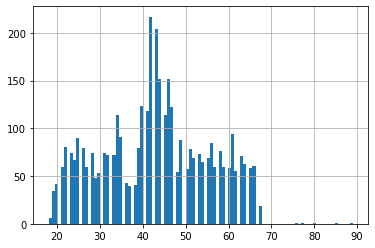

In [83]:
new_demo.age.hist(bins=100)

In [84]:
new_demo.job_industry_category.value_counts()

Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    151
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

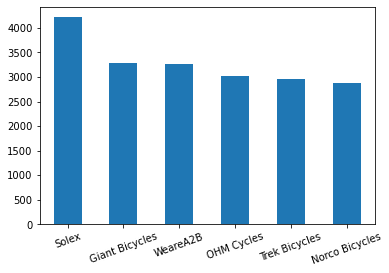

In [85]:
new_transact.brand.value_counts().plot.bar()
plt.xticks(rotation=20);

[rotate axis label](https://stackoverflow.com/questions/1221108/barchart-with-vertical-labels-in-python-matplotlib)
> `plt.xticks(rotation='vertical')`

In [86]:
new_transact.brand.isna().sum()

196

In [87]:
new_demo[(new_demo.job_industry_category.isna()==True) & (new_demo.job_title.isna()==True)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
68,519,Rabi,Nissle,M,83,20,NaN,NaN,Mass Customer,False,True,1.0
90,1599,Ozzy,Silver,M,65,21,NaN,NaN,Affluent Customer,False,False,1.0
101,2342,Clara,Jakel,F,87,21,NaN,NaN,Mass Customer,False,False,2.0
229,3050,Dinnie,Worsom,F,90,23,NaN,NaN,High Net Worth,False,False,5.0
242,3587,Ines,Galfour,F,85,23,NaN,NaN,Affluent Customer,False,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3677,2304,Shelia,Bellew,F,65,63,NaN,NaN,Mass Customer,False,True,11.0
3758,2972,Deena,Burnsides,F,11,64,NaN,NaN,High Net Worth,False,False,17.0
3845,3558,Torey,Sarney,M,16,66,NaN,NaN,High Net Worth,False,True,7.0
3847,3540,Ali,Naris,M,49,66,NaN,NaN,Mass Customer,False,True,7.0


**see most popular job titles in each industry**
> [pandas groupby sort within groups](https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups)

In [88]:
group = new_demo.groupby(['job_industry_category','job_title'])

> [Aggregate operation(s) on axis](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)

In [89]:
group_sum = group.agg({'past_3_years_bike_related_purchases':sum})
group_sum

past_3_years_bike_related_purchases
job_industry_category job_title                                                        
Argiculture           Account Coordinator                                            71
                      Account Executive                                             145
                      Account Representative IV                                     167
                      Administrative Assistant I                                     83
                      Administrative Assistant III                                  133
...                                                                                 ...
Telecommunications    Teacher                                                        99
                      VP Marketing                                                    0
                      VP Product Management                                          63
                      VP Quality Control                                             27
                      Web Designer I                                                 94

[879 rows x 1 columns]

In [90]:
# We group by the first level of the index:
first_level = group_sum['past_3_years_bike_related_purchases'].groupby(level=1, group_keys=False)
first_level.nlargest(3)

job_industry_category  job_title          
Property               Account Coordinator    327
Manufacturing          Account Coordinator    270
Retail                 Account Coordinator     76
Manufacturing          Account Executive      474
Property               Account Executive      303
                                             ... 
Manufacturing          Web Developer III       92
Entertainment          Web Developer III       41
                       Web Developer IV        89
Retail                 Web Developer IV        87
Property               Web Developer IV        44
Name: past_3_years_bike_related_purchases, Length: 503, dtype: int64

In [91]:
first_level.nlargest(3).nlargest(10)
    # why social worker didn't show up in my Power BI visualisation?
    # apparently my calculation here is wrong. there's only 42 social worker in the data
    # ...wait wait. it's not. this is the sum of past3y purchases. then PowerBI is showing wrong aggregation
    # Power BI don't have enough space for all job in their legends

job_industry_category  job_title               
Health                 Dental Hygienist            2144
                       Social Worker               2046
Manufacturing          Chemical Engineer           2035
Health                 Food Chemist                1795
Retail                 Sales Representative        1738
Financial Services     Cost Accountant             1676
Health                 Pharmacist                  1599
                       Research Nurse              1594
                       Registered Nurse            1590
Financial Services     Senior Financial Analyst    1552
Name: past_3_years_bike_related_purchases, dtype: int64

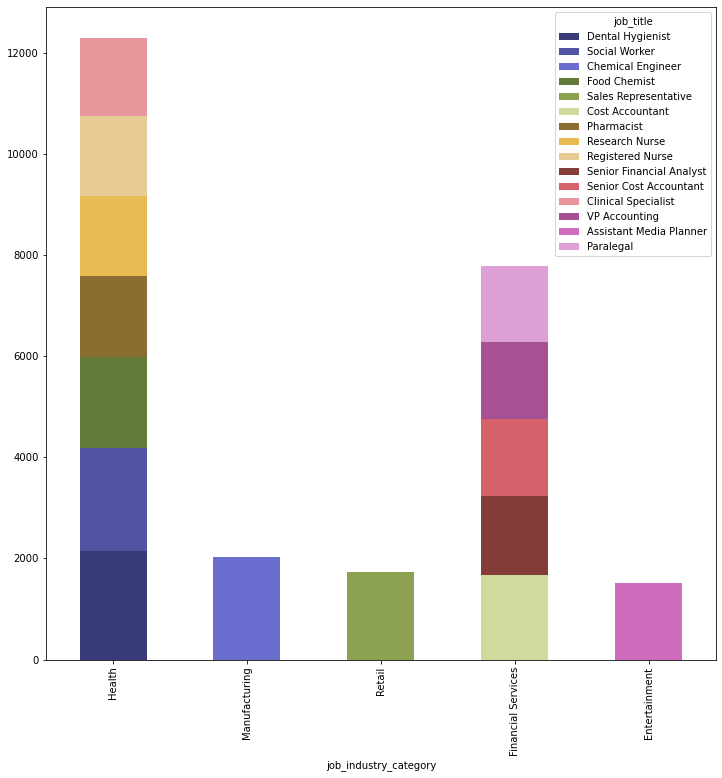

In [92]:
#let's make a stack bar charts
stack = first_level.nlargest(3).nlargest(15)
stack.unstack().plot(kind='bar', stacked=True, figsize=(12,12),cmap='tab20b')
    # >>> new insight - people who work in healthcare tend to buy cycling products the most. followed by finance people

### for similar `groupby` problems... see these questions:
    https://stackoverflow.com/questions/43762744/pandas-dataframe-group-by-a-take-nlargest-by-b-output-c
    https://stackoverflow.com/questions/40390634/pandas-groupby-nlargest-sum
    https://stackoverflow.com/questions/27842613/pandas-groupby-sort-within-groups
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

After researching for models to identify high-value customer, I've found RFM model (recency, frequency, monetary value analysis).

[RFM on excel](https://www.owox.com/blog/use-cases/rfm-analysis/)

[RFM explain](https://www.statisticshowto.com/rfm-customer-value/)

According to these metrics, it’s possible to divide your customers into groups to understand which customers buy lots of things frequently, which buy few things but frequently, and which haven’t bought anything for a long time.

### 3. RFM analysis model
Now we apply this model on our transaction data

In [93]:
new_transact.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


Create new DataFrame from columns of DataFrame<br>
[Extracting specific selected columns to new DataFrame as a copy](https://stackoverflow.com/questions/34682828/extracting-specific-selected-columns-to-new-dataframe-as-a-copy)

`new = old[['A', 'C', 'D']].copy()`

or use `filter`:<br>
`new = old.filter(['A','B','D'], axis=1)`


In [94]:
RFM = new_transact[['customer_id','transaction_date','list_price']].copy()

In [95]:
RFM.head()

,customer_id,transaction_date,list_price
0,2950,2017-02-25,71.49
1,3120,2017-05-21,2091.47
2,402,2017-10-16,1793.43
3,3135,2017-08-31,1198.46
4,787,2017-10-01,1765.30


In [96]:
RFM = RFM.groupby('customer_id')


[Summarising, Aggregating, and Grouping data in Python Pandas](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

![image](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2019/10/pandas-python-group-by-named-aggregation-update.jpg)


[new syntax to rename (pandas> v0.25)](https://stackoverflow.com/questions/19078325/naming-returned-columns-in-pandas-aggregate-function)
`.agg(new_col_name=('col_name', 'agg_func')`

In [97]:
RFM = RFM.agg(Recency = ('transaction_date', 'max'),
        Frequency = ('transaction_date', 'count'),
        Monetary = ('list_price', 'sum')
        )
RFM

,Recency,Frequency,Monetary
customer_id,,,
1,2017-12-23,11,9084.45
2,2017-08-24,3,4149.07
3,2017-09-19,8,9888.23
4,2017-06-18,2,1047.72
5,2017-12-14,6,5903.20
...,...,...,...
3497,2017-11-08,3,3744.07
3498,2017-08-25,6,5177.06
3499,2017-11-09,7,7673.48


Since we need to rank them, the recency column need to be convert into days

In [98]:
# convert recency into how many days ago from 1/1/2018
RFM['Recency'] = np.datetime64('2018-01-01')-RFM['Recency']
RFM['Recency']

customer_id
1        9 days
2      130 days
3      104 days
4      197 days
5       18 days
         ...   
3497    54 days
3498   129 days
3499    53 days
3500   146 days
5034    86 days
Name: Recency, Length: 3493, dtype: timedelta64[ns]

categorise recency into group, ranking from 1 to 3

* 1: [<33%] less than 3 months
* 2: (33-66%] 3 - 9 months
* 4: (66-100%] 9 - 12 months

`.qcut` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

but before that, we need to fully convert the column into integer<br>
[Subtracting two date columns and the result being an integer](https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer)

`.dt.days`

In [99]:
RFM['Recency'].dt.days.dtype

dtype('int64')

In [100]:
_ = pd.qcut(RFM['Recency'].dt.days, 3, labels=[1,2,3])
_

customer_id
1       1
2       3
3       3
4       3
5       1
       ..
3497    2
3498    3
3499    2
3500    3
5034    3
Name: Recency, Length: 3493, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [101]:
# Ranking R
RFM['R'] = _

In [102]:
RFM

,Recency,Frequency,Monetary,R
customer_id,,,,
1,9 days,11,9084.45,1
2,130 days,3,4149.07,3
3,104 days,8,9888.23,3
4,197 days,2,1047.72,3
5,18 days,6,5903.20,1
...,...,...,...,...
3497,54 days,3,3744.07,2
3498,129 days,6,5177.06,3
3499,53 days,7,7673.48,2


categorise Frequency into group, ranking from 1 to 3

* 1: [<33%] Least frequent
* 2: (33-66%] Frequent
* 3: (66-100%] Most Frequent

In [103]:
# Ranking F
RFM['F'] = pd.qcut(RFM['Frequency'], 3, labels=[3,2,1]) # different labels because more frequence is more desireable
RFM

,Recency,Frequency,Monetary,R,F
customer_id,,,,,
1,9 days,11,9084.45,1,1
2,130 days,3,4149.07,3,3
3,104 days,8,9888.23,3,1
4,197 days,2,1047.72,3,3
5,18 days,6,5903.20,1,2
...,...,...,...,...,...
3497,54 days,3,3744.07,2,3
3498,129 days,6,5177.06,3,2
3499,53 days,7,7673.48,2,2


categorise Monetary into group, ranking from 1 to 3

* 1: [<33%] Least paying
* 2: (33-66%] Normal paying
* 3: (66-100%] High paying

In [104]:
# Ranking M
RFM['M'] = pd.qcut(RFM['Monetary'], 3, labels=[3,2,1])
RFM

,Recency,Frequency,Monetary,R,F,M
customer_id,,,,,,
1,9 days,11,9084.45,1,1,1
2,130 days,3,4149.07,3,3,3
3,104 days,8,9888.23,3,1,1
4,197 days,2,1047.72,3,3,3
5,18 days,6,5903.20,1,2,2
...,...,...,...,...,...,...
3497,54 days,3,3744.07,2,3,3
3498,129 days,6,5177.06,3,2,2
3499,53 days,7,7673.48,2,2,1


In [105]:
RFM['RFM']= (RFM.R.astype(str)
             +RFM.F.astype(str)
             +RFM.M.astype(str)
            ).astype(int)
RFM

,Recency,Frequency,Monetary,R,F,M,RFM
customer_id,,,,,,,
1,9 days,11,9084.45,1,1,1,111
2,130 days,3,4149.07,3,3,3,333
3,104 days,8,9888.23,3,1,1,311
4,197 days,2,1047.72,3,3,3,333
5,18 days,6,5903.20,1,2,2,122
...,...,...,...,...,...,...,...
3497,54 days,3,3744.07,2,3,3,233
3498,129 days,6,5177.06,3,2,2,322
3499,53 days,7,7673.48,2,2,1,221


In [ ]:
# OR run this cell to use multiplication instead of sum
RFM['RFM']= (RFM.R.astype(int)
             *RFM.F.astype(int)
             *RFM.M.astype(int)
            ).astype(int)

now that we have the RFM values. the lower RFM score a customer has, the more desireable he/she is

In [106]:
#sorting
RFM.sort_values('RFM',inplace=True)

In [125]:
RFM

,Recency,Frequency,Monetary,R,F,M,RFM
customer_id,,,,,,,
1,9 days,11,9084.45,1,1,1,1
2914,14 days,12,13824.53,1,1,1,1
1991,3 days,10,12813.27,1,1,1,1
1990,12 days,8,7674.47,1,1,1,1
695,18 days,8,10407.64,1,1,1,1
...,...,...,...,...,...,...,...
2431,220 days,2,1447.18,3,3,3,27
503,85 days,4,3993.05,3,3,3,27
2437,200 days,2,1436.80,3,3,3,27


### trace back from RFM to find customer segments

In [126]:
len(RFM.RFM.unique())
    # There are 25 categories of customers
    
    # when using multiplications instead of sum, there are 10 RFM categories

10

In [129]:
customer_combined_RFM = pd.merge(customer_combined,RFM.RFM,on='customer_id')
customer_combined_RFM.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,RFM
0,66,Anselm,Gawne,M,46,18,Account Executive,Argiculture,High Net Worth,False,False,1.0,163 Straubel Trail,2217,NSW,Australia,10,12
1,1888,Sibyl,Scholtz,F,67,18,Food Chemist,Health,Mass Customer,False,True,1.0,9 Emmet Hill,2042,NSW,Australia,10,18
2,3435,Stevena,Allcock,F,80,18,Senior Editor,NaN,Affluent Customer,False,False,1.0,400 Petterle Crossing,4301,QLD,Australia,3,18
3,2858,Benedicto,Radki,M,4,18,Recruiting Manager,NaN,Mass Customer,False,True,1.0,0555 Tomscot Plaza,2044,NSW,Australia,10,9
4,422,Vito,Norker,M,78,18,NaN,Manufacturing,Affluent Customer,False,False,1.0,509 Fisk Hill,2031,NSW,Australia,11,18


[reorder the dataframe columns](https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns)

`df = df[['col0', 'col1', 'col2', 'col3']]`

You can get the list of columns with:
`list(df.columns.values)`

In [130]:
list(customer_combined_RFM.columns.values)

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'RFM']

In [131]:
customer_combined_RFM = customer_combined_RFM[['customer_id','RFM',
 'gender',
 'past_3_years_bike_related_purchases',
 'age',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'postcode',
 'state',
 'country',
 'property_valuation',
  ]]
    #remove name, address, move rfm after id
customer_combined_RFM

,customer_id,RFM,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation
0,66,12,M,46,18,Account Executive,Argiculture,High Net Worth,False,False,1.0,2217,NSW,Australia,10
1,1888,18,F,67,18,Food Chemist,Health,Mass Customer,False,True,1.0,2042,NSW,Australia,10
2,3435,18,F,80,18,Senior Editor,NaN,Affluent Customer,False,False,1.0,4301,QLD,Australia,3
3,2858,9,M,4,18,Recruiting Manager,NaN,Mass Customer,False,True,1.0,2044,NSW,Australia,10
4,422,18,M,78,18,NaN,Manufacturing,Affluent Customer,False,False,1.0,2031,NSW,Australia,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,658,18,M,38,76,Tax Accountant,Manufacturing,Affluent Customer,False,True,8.0,3025,VIC,Australia,9
3407,2413,4,M,27,77,Environmental Specialist,Manufacturing,High Net Worth,False,True,17.0,3082,VIC,Australia,8
3408,3410,27,F,93,80,NaN,Property,Mass Customer,False,False,16.0,2049,NSW,Australia,10
3409,1092,18,F,56,85,VP Quality Control,Retail,Mass Customer,False,False,5.0,3337,VIC,Australia,3


In [132]:
# checking patterns RFM group with tenure and property values
customer_combined_RFM.groupby('RFM')['tenure','property_valuation'].describe()
# now lets's plot them in boxplot

<ipython-input-132-1236131e22a6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_combined_RFM.groupby('RFM')['tenure','property_valuation'].describe()


tenure                                                   \
     count       mean       std  min  25%   50%   75%   max   
RFM                                                           
1    291.0  10.883162  5.735560  1.0  6.0  11.0  16.0  22.0   
2    426.0  10.340376  5.736907  1.0  6.0  10.0  15.0  22.0   
3    103.0  10.640777  5.530405  1.0  6.5  11.0  15.0  22.0   
4    392.0  10.844388  5.613627  1.0  7.0  11.0  15.0  22.0   
6    343.0  10.644315  5.601432  1.0  6.0  11.0  15.0  22.0   
8    175.0  10.634286  5.596897  1.0  6.0  11.0  16.0  21.0   
9    292.0  11.184932  5.751442  1.0  6.0  11.0  16.0  22.0   
12   345.0  10.275362  5.693438  1.0  6.0  10.0  15.0  22.0   
18   532.0  10.719925  5.629367  1.0  6.0  11.0  15.0  22.0   
27   512.0  10.714844  5.729446  1.0  6.0  11.0  15.0  22.0   

    property_valuation                                                 
                 count      mean       std  min  25%  50%   75%   max  
RFM                                                                    
1                291.0  7.326460  2.974597  1.0  5.0  8.0   9.0  12.0  
2                426.0  7.638498  2.693927  1.0  6.0  8.0  10.0  12.0  
3                103.0  7.980583  2.793482  1.0  7.0  8.0  10.0  12.0  
4                392.0  7.471939  2.882921  1.0  6.0  8.0  10.0  12.0  
6                343.0  7.352770  2.962887  1.0  5.0  8.0   9.0  12.0  
8                175.0  6.902857  3.012759  1.0  5.0  8.0   9.0  12.0  
9                292.0  7.599315  2.652963  1.0  6.0  8.0  10.0  12.0  
12               345.0  7.721739  2.649752  1.0  6.0  8.0  10.0  12.0  
18               532.0  7.524436  2.927460  1.0  6.0  8.0  10.0  12.0  
27               512.0  7.597656  2.703595  1.0  6.0  8.0  10.0  12.0

In [133]:
RFM_tenure = customer_combined_RFM.groupby('RFM')['tenure']
RFM_prop_values = customer_combined_RFM.groupby('RFM')['property_valuation']

[Boxplot with pandas groupby multiindex, for specified sublevels from multiindex](https://stackoverflow.com/questions/18498690/boxplot-with-pandas-groupby-multiindex-for-specified-sublevels-from-multiindex)

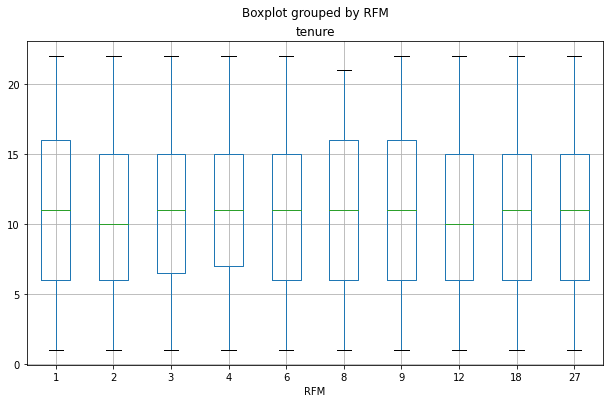

In [134]:
customer_combined_RFM.boxplot(column='tenure',by='RFM',figsize=(10,6));

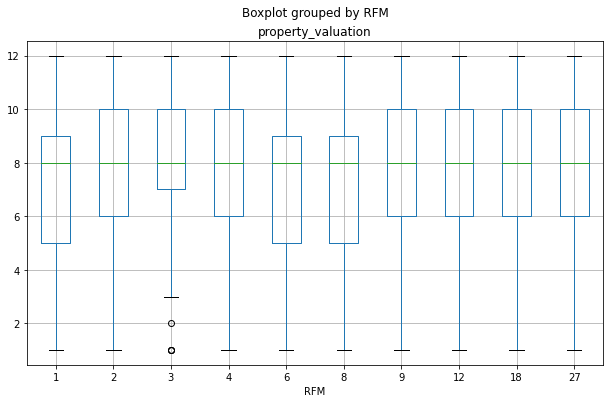

In [135]:
customer_combined_RFM.boxplot(column='property_valuation',by='RFM',figsize=(10,6));

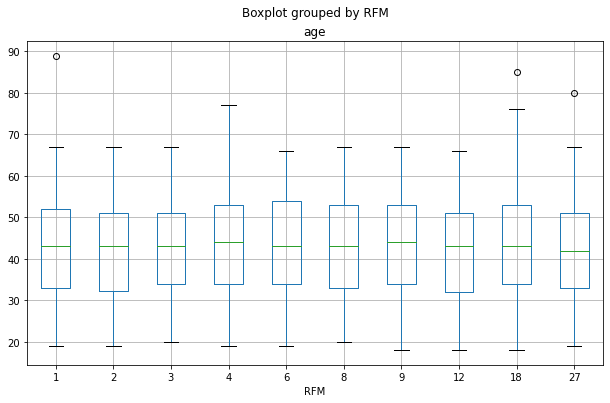

In [136]:
customer_combined_RFM.boxplot(column='age',by='RFM',figsize=(10,6));

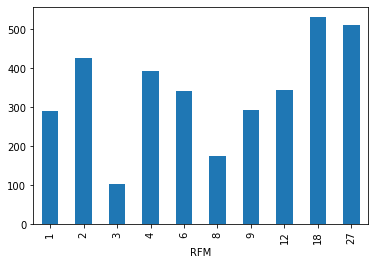

In [137]:
# checking patterns RFM group with categorical values (job/industry/wealth/gender/owncars/state)
customer_combined_RFM.groupby('RFM')['owns_car'].count().plot(kind='bar');

In [118]:
# what if multiply to get RFM instead of joining (since joining only prioritise recent buyer)
RFM['RFM']= (RFM.R.astype(int)
             *RFM.F.astype(int)
             *RFM.M.astype(int)
            ).astype(int)
RFM.RFM.unique()
# don't forget to go back and run the codes again, apply new RFM values

array([ 1,  2,  3,  4,  6,  9,  8, 12, 18, 27])

In [138]:
# select people in top 3 groups
top3RFM = customer_combined_RFM[customer_combined_RFM['RFM']<=3]
top3RFM

,customer_id,RFM,gender,past_3_years_bike_related_purchases,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,state,country,property_valuation
7,1402,2,M,58,19,Assistant Professor,Telecommunications,Mass Customer,False,False,1.0,3107,VIC,Australia,8
8,1519,1,M,35,19,Administrative Assistant IV,Telecommunications,High Net Worth,False,True,1.0,2260,NSW,Australia,8
12,1250,2,F,42,19,Help Desk Technician,Manufacturing,Mass Customer,False,False,1.0,4818,QLD,Australia,7
23,874,2,M,78,19,NaN,Health,Mass Customer,False,True,1.0,2010,NSW,Australia,10
25,3112,1,M,41,19,Internal Auditor,Retail,High Net Worth,False,True,1.0,3162,VIC,Australia,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,1905,1,F,21,67,Help Desk Technician,Manufacturing,Affluent Customer,False,False,15.0,2166,NSW,Australia,6
3400,2019,2,F,48,67,VP Marketing,Entertainment,High Net Worth,False,False,17.0,4825,QLD,Australia,2
3403,1177,3,F,47,67,Food Chemist,Health,Affluent Customer,False,True,6.0,2150,NSW,Australia,8
3405,1243,3,M,73,67,Research Assistant II,Retail,Mass Customer,False,False,8.0,2155,NSW,Australia,11


In [139]:
#Export to Excel, maybe change boolean to Yes/No before that
# top3RFM.to_excel("top3RFM.xlsx", sheet_name='top3RFM')

In [140]:
# let's see popular jobtitle in each industry (repeat steps above)
group_top3RFM = top3RFM.groupby(['job_industry_category','job_title'])
group_sum_top3RFM = group_top3RFM.agg({'past_3_years_bike_related_purchases':sum})
group_sum_top3RFM

past_3_years_bike_related_purchases
job_industry_category job_title                                                       
Argiculture           Account Coordinator                                           71
                      Account Representative IV                                     95
                      Administrative Assistant IV                                   38
                      Administrative Officer                                        61
                      Assistant Professor                                           98
...                                                                                ...
Telecommunications    Recruiter                                                      9
                      Senior Quality Engineer                                       55
                      Tax Accountant                                                95
                      VP Product Management                                         10
                      VP Quality Control                                            27

[351 rows x 1 columns]

In [141]:
# We group by the first level of the index:
first_level = group_sum_top3RFM['past_3_years_bike_related_purchases'].groupby(level=1, group_keys=False)
first_level.nlargest(3)

job_industry_category  job_title          
Argiculture            Account Coordinator     71
IT                     Account Coordinator     41
Financial Services     Account Coordinator      0
Manufacturing          Account Executive      132
Health                 Account Executive       77
                                             ... 
Retail                 Web Developer I         72
Manufacturing          Web Developer I         28
                       Web Developer II        27
Entertainment          Web Developer IV        89
Argiculture            Web Developer IV         5
Name: past_3_years_bike_related_purchases, Length: 306, dtype: int64

In [142]:
first_level.nlargest(3).nlargest(10)

job_industry_category  job_title             
Health                 Clinical Specialist       588
                       Food Chemist              570
                       Registered Nurse          475
                       Dental Hygienist          455
Financial Services     Actuary                   451
                       Compensation Analyst      438
Manufacturing          Electrical Engineer       426
                       Chemical Engineer         397
Health                 Social Worker             375
Financial Services     Senior Cost Accountant    369
Name: past_3_years_bike_related_purchases, dtype: int64

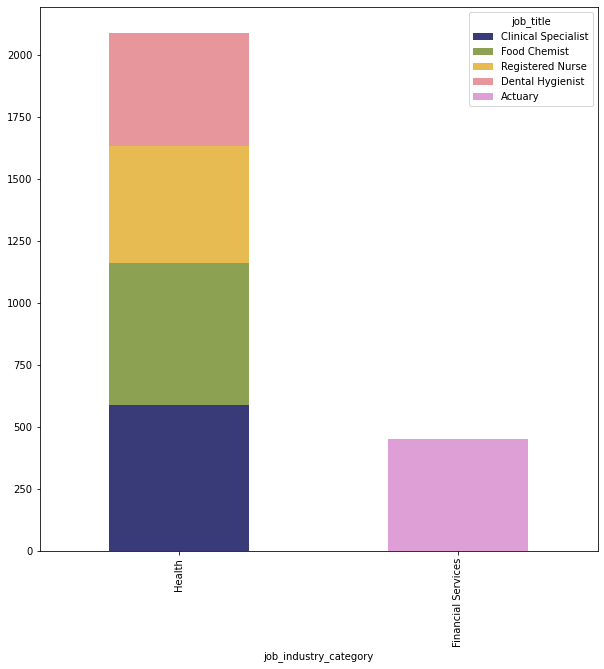

In [143]:
#let's make a stack bar charts
stack = first_level.nlargest(3).nlargest(5)
stack.unstack().plot(kind='bar', stacked=True, figsize=(10,10),cmap='tab20b');
    # >>> new insight - people who work in healthcare tend to buy cycling products the most. followed by finance people

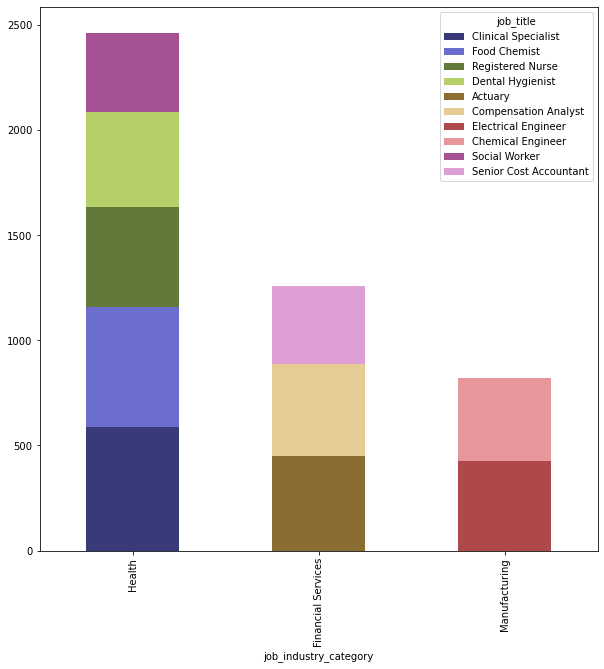

In [144]:
stack = first_level.nlargest(3).nlargest(10)
stack.unstack().plot(kind='bar', stacked=True, figsize=(10,10),cmap='tab20b');

### customise graphs for presentation slides

Text(0, 0.5, 'Count')

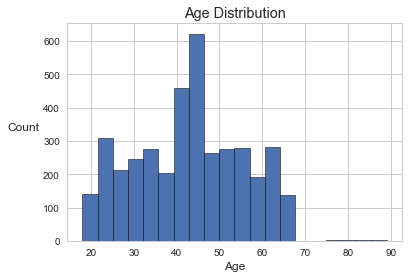

In [375]:
#Age distribution
fig, ax = plt.subplots(figsize=(6,4))
customer_combined.age.hist(bins=20,edgecolor='black');
ax.set_title("Age Distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Count",rotation=0,labelpad=20)

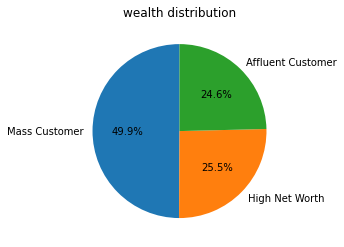

In [146]:
# customer market pie chart
fig, ax = plt.subplots(figsize=(6,4))
customer_combined['wealth_segment'].value_counts().plot.pie(autopct='%1.1f%%',startangle=90) # show percentage
ax.set_title("wealth distribution")
plt.axis('off'); # hide axis

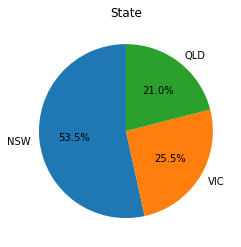

In [147]:
# State pie chart
fig, ax = plt.subplots(figsize=(6,4))
customer_combined['state'].value_counts().plot.pie(autopct='%1.1f%%',startangle =90) # show percentage
ax.set_title("State")
plt.axis('off'); # hide axis

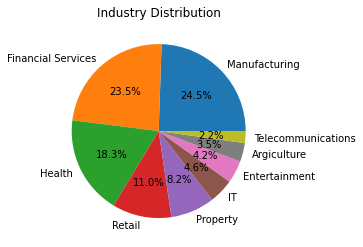

In [148]:
# Industry distribution
fig, ax = plt.subplots(figsize=(6,4))
customer_combined['job_industry_category'].value_counts().plot.pie(autopct='%1.1f%%')
ax.set_title("Industry Distribution")
plt.axis('off');

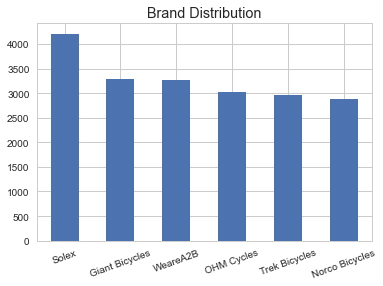

In [368]:
#brand distribution
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(6,4))
new_transact.brand.value_counts().plot.bar()
ax.set_title("Brand Distribution")
plt.xticks(rotation=20);

Text(0, 0.5, 'Count')

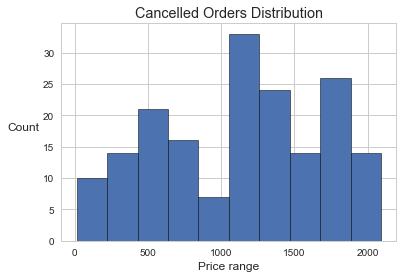

In [373]:
#Cancelled order distributions
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(6,4))
cancelled = transact[(transact.order_status=="Cancelled")]
cancelled.list_price.hist(bins=10,edgecolor='black') # edge colours
ax.set_title("Cancelled Orders Distribution")
ax.set_xlabel("Price range")
ax.set_ylabel("Count",rotation=0,labelpad=20)
    # unclear trend in list price of cancelled transactions

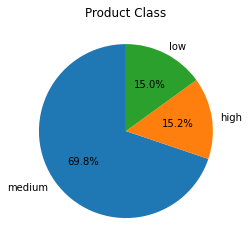

In [151]:
# product class pie chart
fig, ax = plt.subplots(figsize=(6,4))
new_transact['product_class'].value_counts().plot.pie(autopct='%1.1f%%',startangle =90)
ax.set_title("Product Class")
plt.axis('off');

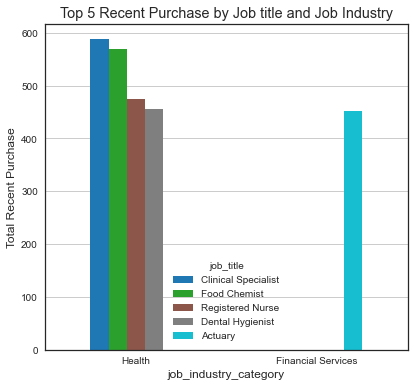

In [371]:
#Top 5 recent purchase
plt.style.use('seaborn-white')
stack = first_level.nlargest(3).nlargest(5)
stack.unstack().plot.bar(stacked=False, figsize=(6.5,6),cmap='tab10');
plt.ylabel("Total Recent Purchase")
plt.title("Top 5 Recent Purchase by Job title and Job Industry")
plt.xticks(rotation=0);
plt.grid(axis='y')
    # >>> new insight - people who work in healthcare tend to buy cycling products the most. followed by finance people

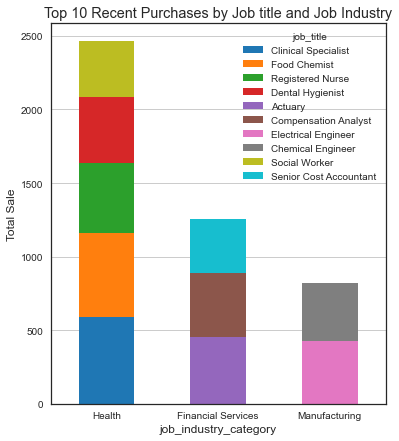

In [376]:
#Top 10 recent purchase
plt.style.use('seaborn-white')
stack = first_level.nlargest(3).nlargest(10)
stack.unstack().plot.bar(stacked=True, figsize=(6,7),cmap='tab10');
plt.ylabel("Total Sale")
plt.title("Top 10 Recent Purchases by Job title and Job Industry")
plt.xticks(rotation=0);
plt.grid(axis='y')
    # >>> new insight - people who work in healthcare tend to buy cycling products the most. followed by finance people

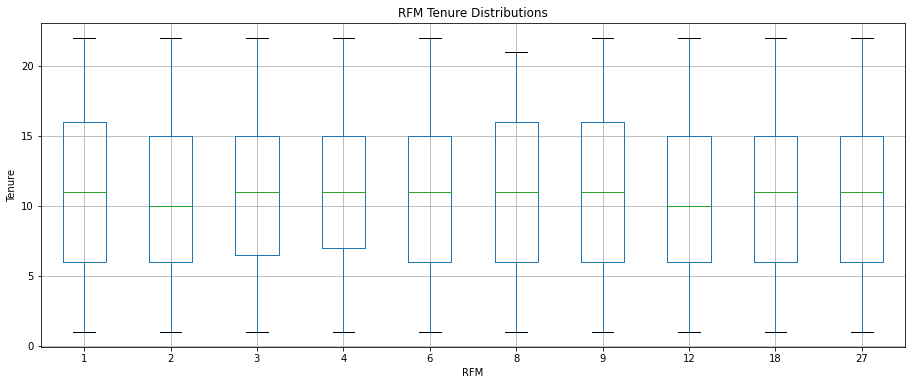

In [187]:
customer_combined_RFM.boxplot(column='tenure',by='RFM',figsize=(15,6))
plt.ylabel("Tenure")
plt.title("RFM Tenure Distributions")
plt.suptitle(''); # remove "boxplot groupby..."

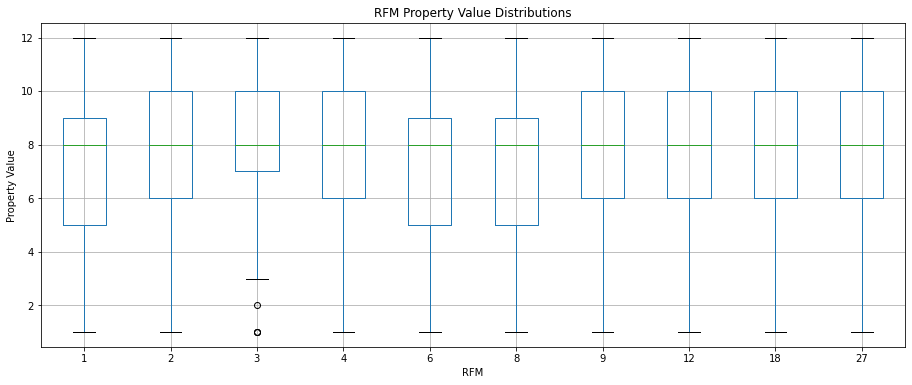

In [191]:
customer_combined_RFM.boxplot(column='property_valuation',by='RFM',figsize=(15,6))
plt.ylabel("Property Value")
plt.title("RFM Property Value Distributions")
plt.suptitle(''); # remove "boxplot groupby..."

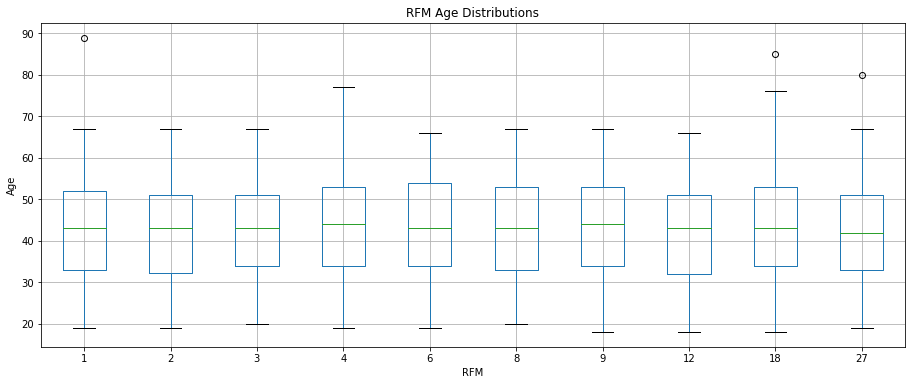

In [189]:
customer_combined_RFM.boxplot(column='age',by='RFM',figsize=(15,6));
plt.ylabel("Age")
plt.title("RFM Age Distributions")
plt.suptitle(''); # remove "boxplot groupby..."

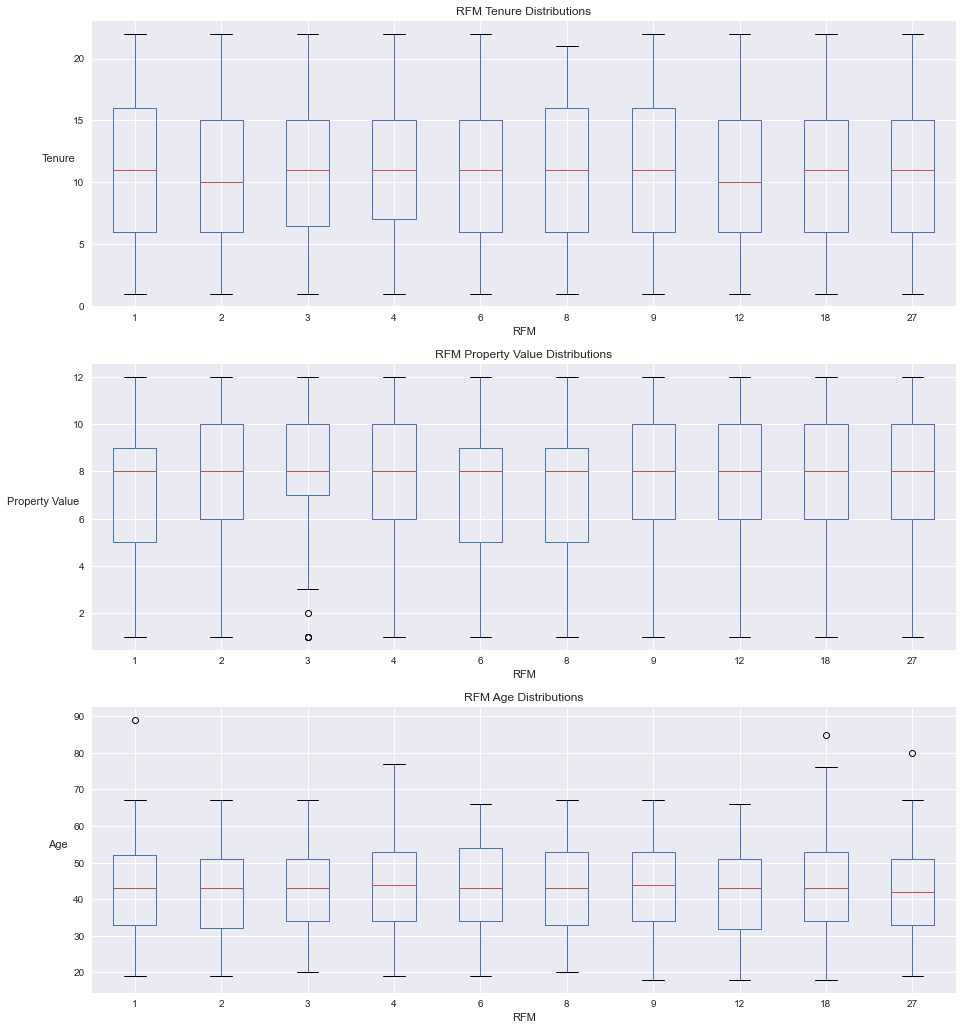

In [357]:
#stacking boxplots share axis
fig, (ax0,ax1,ax2) = plt.subplots(3,1, sharex=False, sharey=False,figsize=(15,18))
plt.style.use('seaborn')

customer_combined_RFM.boxplot(column='tenure',by='RFM',ax=ax0) # use ax=ax0 to fit in axes
ax0.set_ylabel("Tenure",rotation=0,labelpad=15)
ax0.set_title("RFM Tenure Distributions")

customer_combined_RFM.boxplot(column='property_valuation',by='RFM',ax=ax1)
ax1.set_ylabel("Property Value",rotation=0,labelpad=30)
ax1.set_title("RFM Property Value Distributions")

customer_combined_RFM.boxplot(column='age',by='RFM',ax=ax2);
ax2.set_ylabel("Age",rotation=0,labelpad=15)
ax2.set_title("RFM Age Distributions")

fig.suptitle(''); # remove "boxplot groupby..."

checking out matplotlib styles here: https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html